# –î–æ–º–∞—à–Ω–µ–µ –∑–∞–¥–∞–Ω–∏–µ. Transformers.

–ü—Ä–∏–≤–µ—Ç! –≠—Ç–æ –æ—á–µ—Ä–µ–¥–Ω–æ–µ –¥–æ–º–∞—à–Ω–µ–µ –∑–∞–¥–∞–Ω–∏–µ, –Ω–æ —Ç–µ–ø–µ—Ä—å —Ç—ã –ø–æ–∑–Ω–∞–∫–æ–º–∏—à—å—Å—è —Å –º–æ–¥–µ–ª—è —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–µ—Ä–æ–≤ –∏ —Å –±–∏–±–ª–∏–æ—Ç–µ–∫–æ–π `HuggingFaceü§ó`. –í —ç—Ç–æ–º –∑–∞–¥–∞–Ω–∏–∏ –±—É–¥–µ—Ç –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–æ —Ä–µ—à–∏—Ç—å —Å –ø–æ–º–æ—â—å—é –º–æ–¥–µ–ª–∏ `GPT2` –ø—Ä–æ—Å—Ç—É—é –∑–∞–¥–∞—á—É (–∞–Ω–∞–ª–∏–∑ —Å–µ–Ω—Ç–∏–º–µ–Ω—Ç–∞) –∏ —Å–¥–µ–ª–∞—Ç—å –Ω–µ–±–æ–ª—å—à–æ–µ –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏–µ –∫–∞—Ä—Ç –≤–Ω–∏–º–∞–Ω–∏—è. –ü—Ä–∏—Å—Ç—É–ø–∏–º!

Student: Oleg Navolotsky / –û–ª–µ–≥ –ù–∞–≤–æ–ª–æ—Ü–∫–∏–π  
Stepik: https://stepik.org/users/2403189  
Telegram: [@oleg_navolotsky](https://t.me/oleg_navolotsky)  

**Note**: reproducibility depends on [different things](https://pytorch.org/docs/stable/notes/randomness.html):
>Completely reproducible results are not guaranteed across PyTorch releases, individual commits, or different platforms. Furthermore, results may not be reproducible between CPU and GPU executions, even when using identical seeds.

In [1]:
COLAB = None
DONT_USE_GPU = None

if COLAB is None:
    try:
        import google.colab
    except ModuleNotFoundError:
        COLAB = False
    else:
        COLAB = True

if DONT_USE_GPU is None:
    DONT_USE_GPU = not COLAB

COLAB, DONT_USE_GPU

(False, True)

In [2]:
if COLAB:
    !pip install -q transformers datasets tokenizers

In [3]:
import warnings

warnings.filterwarnings("ignore", module="ipykernel", category=DeprecationWarning)
warnings.filterwarnings("ignore", module="tensorflow", category=DeprecationWarning)

In [4]:
if COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    import os
    os.chdir("/content/drive/MyDrive/MIPT_DLS_II/14.1 –î–æ–º–∞—à–Ω–µ–µ –∑–∞–¥–∞–Ω–∏–µ. Transformers+")
    print(os.getcwd())

In [5]:
import os

if COLAB:
    CACHE_BASE_DIR = os.path.join(os.getcwd(), ".cache")
else:
    CACHE_BASE_DIR = r"C:\.data_science_cache"

CACHE_BASE_DIR

'C:\\.data_science_cache'

In [6]:
import torch

def try_to_clear_gpu_memory(gpu_related_variables_names=("model", "optimizer", "criterion", "scheduler")):
    for name in gpu_related_variables_names:
        try:
            del globals()[name]
        except KeyError:
            pass
    torch.cuda.empty_cache()

In [7]:
import os
import random

import numpy as np
import torch


SEED = 42


def enable_reproducibility(
        seed=SEED, raise_if_no_deterministic=True,
        cudnn_deterministic=True, disable_cudnn_benchmarking=True):
    # https://pytorch.org/docs/stable/notes/randomness.html#avoiding-nondeterministic-algorithms
    torch.use_deterministic_algorithms(raise_if_no_deterministic)

    # https://docs.nvidia.com/cuda/cublas/index.html#cublasApi_reproducibility
    os.environ['CUBLAS_WORKSPACE_CONFIG'] = ":4096:8"
    
    torch.backends.cudnn.benchmark = not disable_cudnn_benchmarking
    torch.backends.cudnn.deterministic = cudnn_deterministic

    torch.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)

In [8]:
enable_reproducibility()

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker

import torch
import torch.nn as nn

from transformers import GPT2ForSequenceClassification, GPT2TokenizerFast, GPT2Config
from datasets import load_dataset

C:\Users\user0\anaconda3\envs\custom\lib\site-packages\ipykernel\pylab\config.py:70: DeprecationWarning: InlineBackend._figure_formats_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_formats_changed(self, name, old, new):
C:\Users\user0\anaconda3\envs\custom\lib\site-packages\packaging\version.py:127: DeprecationWarning: Creating a LegacyVersion has been deprecated and will be removed in the next major release
  warnings.warn(


In [10]:
if DONT_USE_GPU:
    device = torch.device("cpu")
else:
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

–î–∞—Ç–∞—Å–µ—Ç, –∫–æ—Ç–æ—Ä—ã–π –º—ã –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —Å–µ–≥–æ–¥–Ω—è ‚Äì —Ç–µ–∫—Å—Ç—ã –∏–∑ –∞–Ω–≥–ª–∏–π—Å–∫–æ–≥–æ —Ç–≤–∏—Ç—Ç–µ—Ä–∞. –û–Ω–∏ —É–∂–µ –ø–æ—á–∏—â–µ–Ω–Ω—ã –æ—Ç –Ω–∏–∫–Ω–µ–π–º–æ–≤, –∑–Ω–∞–∫–æ–≤ –ø—Ä–µ–ø–∏–Ω–∞–Ω–∏—è –∏ –ø—Ä–æ—á–µ–≥–æ. 

In [11]:
emotion_dataset = load_dataset("emotion", cache_dir=os.path.join(CACHE_BASE_DIR, r"huggingface\datasets"), keep_in_memory=True)

Using custom data configuration default
Reusing dataset emotion (C:\.data_science_cache\huggingface\datasets\emotion\default\0.0.0\aa34462255cd487d04be8387a2d572588f6ceee23f784f37365aa714afeb8fe6)


–ü–æ—Å–º–æ—Ç—Ä–∏, –∏–∑ —á–µ–≥–æ —Å–æ—Å—Ç–æ–∏—Ç `emotion_dataset`:

In [12]:
emotion_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [13]:
emotion_dataset["train"]

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [14]:
emotion_dataset["train"]["text"][0]

'i didnt feel humiliated'

In [15]:
emotion_dataset["train"]["label"][0]

0

In [16]:
len(emotion_dataset["train"])

16000

–î–ª—è –ø–µ—Ä–µ–≤–æ–¥–∞ —Ç–µ–∫—Å—Ç–∞ –≤ —Ç–æ–∫–µ–Ω—ã –º—ã –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –ø—Ä–µ–¥–æ–±—É—á–µ–Ω–Ω—ã–π BPE-—Ç–æ–∫–µ–Ω–∞–π–∑–µ—Ä.

In [17]:
tokenizer = GPT2TokenizerFast.from_pretrained(
    "distilgpt2",
    cache_dir=os.path.join(CACHE_BASE_DIR, r"huggingface\pretrained_models\distilgpt2\tokenizers"))
tokenizer.pad_token = tokenizer.eos_token  # –£ gpt2 –Ω–µ—Ç pad —Ç–æ–∫–µ–Ω–æ–≤. –í–º–µ—Å—Ç–æ –Ω–∏—Ö –≤–æ—Å–ø–æ–ª—å–∑—É–µ–º—Å—è —Ç–æ–∫–µ–Ω–∞–º–∏ –∫–æ–Ω—Ü–∞ —Ç–µ–∫—Å—Ç–∞.

–ü–æ–¥–≥–æ—Ç–æ–≤—å –∫–ª–∞—Å—Å, –∫–æ—Ç–æ—Ä—ã–π –ø—Ä–∏–Ω–∏–º–∞–µ—Ç –¥–∞—Ç–∞—Å–µ—Ç, —Ç–æ–∫–µ–Ω–∞–π–∑–µ—Ä –∏ –∏–º—è –∏—Å–ø–æ–ª—å–∑—É–µ–º–æ–π —á–∞—Å—Ç–∏ (`train`, `validation`, `test`). –ò—Å–ø–æ–ª—å–∑—É–π –µ–≥–æ –¥–ª—è –ø–æ–ª—É—á–µ–Ω–∏—è –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –æ–±—É—á–µ–Ω–∏—è.

P.S. –ü–æ—Å–º–æ—Ç—Ä–∏, –∫–∞–∫ —Ä–∞–±–æ—Ç–∞–µ—Ç —Ç–æ–∫–µ–Ω–∞–π–∑–µ—Ä ([docs](https://huggingface.co/transformers/main_classes/tokenizer.html)) –∏ –ø–æ–¥—É–º–∞–π, –∫–∞–∫ –µ–≥–æ –Ω–∞–¥–æ –¥–æ–±–∞–≤–∏—Ç—å –≤ –¥–∞—Ç–∞—Å–µ—Ç.

–ù–µ–º–Ω–æ–≥–æ –ø—Ä–∏–º–µ—Ä–æ–≤, –∫–∞–∫ —Ä–∞–±–æ—Ç–∞–µ—Ç —Ç–æ–∫–µ–Ω–∞–π–∑–µ—Ä. –≠—Ç–æ –ø–æ–º–æ–∂–µ—Ç —Å –Ω–∞–ø–∏—Å–∞–Ω–∏–µ–º –¥–∞—Ç–∞—Å–µ—Ç–∞.

In [18]:
tokenizer.tokenize(emotion_dataset["train"]["text"][0])

['i', 'ƒ†didnt', 'ƒ†feel', 'ƒ†humiliated']

In [19]:
tokenizer.encode(emotion_dataset["train"]["text"][0])

[72, 42547, 1254, 42659]

In [20]:
tokenizer.encode_plus(emotion_dataset["train"]["text"][0])

{'input_ids': [72, 42547, 1254, 42659], 'attention_mask': [1, 1, 1, 1]}

In [21]:
tokenizer.encode_plus(emotion_dataset["train"]["text"][0], return_tensors="pt")

{'input_ids': tensor([[   72, 42547,  1254, 42659]]), 'attention_mask': tensor([[1, 1, 1, 1]])}

In [22]:
tokenizer.encode_plus(
    emotion_dataset["train"]["text"][0], 
    max_length=128, # –º–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è –¥–ª–∏–Ω–∞ —Ç–µ–∫—Å—Ç–∞
    padding="max_length", # –Ω–∞–¥–æ –ª–∏ –¥–æ–±–∞–≤–ª—è—Ç—å –ø–∞–¥–¥–∏–Ω–≥ –≤ –∫–æ–Ω—Ü–µ?
    return_tensors="pt", # –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç pytorch —Ç–µ–Ω–∑–æ—Ä—ã
)

{'input_ids': tensor([[   72, 42547,  1254, 42659, 50256, 50256, 50256, 50256, 50256, 50256,
         50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
         50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
         50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
         50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
         50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
         50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
         50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
         50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
         50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
         50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
         50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
         50256, 50256, 50256, 50256, 5

In [23]:
# –ï—Å–ª–∏ –Ω–∞–¥–æ, –ø–æ–ø—Ä–∞–∫—Ç–∏–∫—É–π—Å—è —Ä–∞–±–æ—Ç–∞—Ç—å —Å —Ç–æ–∫–µ–Ω–∞–π–∑–µ—Ä–æ–º –∑–¥–µ—Å—å

In [24]:
class TweetDataset(torch.utils.data.Dataset):
    def __init__(self, part, dataset=emotion_dataset, tokenizer=tokenizer, max_length=128):
        self.part = part
        self.dataset = dataset
        self.tokenizer = tokenizer
        self.max_length = max_length
        
        self.labels = np.unique(dataset[part]["label"])
        self.label2num = {l: num for num, l in enumerate(self.labels)}
        
    def __getitem__(self, idx):
        """
        Return dict with tokens, attention_mask and label
        """
        text = self.dataset[self.part]['text'][idx]
        label = self.dataset[self.part]['label'][idx]
        
        tokenizer_output = self.tokenizer.encode_plus(
            text, padding="max_length", max_length=self.max_length, 
            return_tensors="pt",
        )
        target = self.label2num[label]
        return {
            "input_ids": tokenizer_output['input_ids'].squeeze(0), 
            "mask": tokenizer_output['attention_mask'].squeeze(0),
            "target": target
        }
        
    def __len__(self):
        """
        Return length of dataset
        """
        return len(self.dataset[self.part])

–°–æ–∑–¥–∞–π `train`, `validation` –∏ `test` —á–∞—Å—Ç–∏ –¥–∞—Ç–∞—Å–µ—Ç–∞. –ó–∞–≥—Ä—É–∑–∏ –∏—Ö –≤ `DataLoaders`.

In [25]:
train_dataset = TweetDataset("train", emotion_dataset, tokenizer)
valid_dataset = TweetDataset("validation", emotion_dataset, tokenizer)
test_dataset = TweetDataset("test", emotion_dataset, tokenizer)

In [26]:
enable_reproducibility()

batch_size = 64  # –ó–∞–¥–∞–π batch_size

train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True, drop_last=True
)
valid_loader = torch.utils.data.DataLoader(
    valid_dataset, batch_size=batch_size
)
test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=batch_size
)

## –ù–∞—á–Ω–µ–º —Å –Ω—É–ª—è.

–ü–æ–ø—Ä–æ–±—É–µ–º –æ–±—É—á–∏—Ç—å –º–æ–¥–µ–ª—å —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–µ—Ä —Å –Ω—É–ª—è —Ä–µ—à–∞—Ç—å –¥–∞–Ω–Ω—É—é –∑–∞–¥–∞—á—É.

In [27]:
NUM_LABELS = len((set(emotion_dataset['train']['label'])))
NUM_LABELS

6

In [28]:
# try_to_clear_gpu_memory(["model_0", "optimizer", "criterion", "scheduler"])

In [29]:
enable_reproducibility()

config = GPT2Config.from_pretrained(
    "distilgpt2",  # distilgpt2 ‚Äì¬†—É–º–µ–Ω—å—à–µ–Ω–Ω–∞—è –≤–µ—Ä—Å–∏—è –º–æ–¥–µ–ª–∏ gpt2
    output_attentions=True,
    pad_token_id=tokenizer.eos_token_id,
    num_labels=NUM_LABELS,
    cache_dir=os.path.join(CACHE_BASE_DIR, r"huggingface\pretrained_models\distilgpt2\config")
)
model_0 = GPT2ForSequenceClassification(config=config).to(device)  # GPT2 –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ —Ç–µ–∫—Å—Ç–∞

–ü–æ–¥–≥–æ—Ç–æ–≤—å –æ–ø—Ç–∏–º–∞–π–∑–µ—Ä –∏ –∫—Ä–∏—Ç–µ—Ä–∏–π:

In [30]:
lr = 1e-5  # –ü—Ä–µ–¥–ø–æ–ª–∞–≥–∞–µ–º—ã–π learning rate. –û–Ω –º–æ–∂–µ—Ç –±—ã—Ç—å –±–æ–ª—å—à–µ –∏–ª–∏ –º–µ–Ω—å—à–µ :)

optimizer = torch.optim.Adam(model_0.parameters(), lr=lr)
criterion = torch.nn.CrossEntropyLoss()
scheduler = None  # –ú–æ–∂–Ω–æ –¥–æ–±–∞–≤–∏—Ç—å —à–µ–¥—É–ª–µ—Ä –¥–ª—è –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–µ–π. –≠—Ç–æ –Ω–∞ —Ç–≤–æ–µ —É—Å–º–æ—Ç—Ä–µ–Ω–∏–µ

–ü–æ—Å–º–æ—Ç—Ä–∏, —á—Ç–æ –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç –º–æ–¥–µ–ª—å ([docs](https://huggingface.co/transformers/model_doc/gpt2.html#gpt2forsequenceclassification)), –µ—Å–ª–∏ –≤ –Ω–µ—ë –ø–æ–¥–∞—Ç—å –¥–∞–Ω–Ω—ã–µ:

In [29]:
tokens = train_dataset[0]['input_ids'].unsqueeze(0).to(device)  # –ü–æ–ª—É—á–∏ —Ç–æ–∫–µ–Ω—ã –∏–∑ –¥–∞—Ç–∞—Å–µ—Ç–∞
mask = train_dataset[0]['mask'].unsqueeze(0).to(device)

model_0.eval()
with torch.no_grad():
    outputs = model_0(input_ids=tokens, attention_mask=mask)  # –ü–æ—Å–º–æ—Ç—Ä–∏ –Ω–∞ –∞—É—Ç–ø—É—Ç

In [30]:
type(outputs), isinstance(outputs, dict)

(transformers.modeling_outputs.SequenceClassifierOutputWithPast, True)

In [31]:
{key: type(value) for key, value in outputs.items()}

{'attentions': tuple, 'logits': torch.Tensor, 'past_key_values': tuple}

In [32]:
assert outputs.logits.shape[-1] == NUM_LABELS, outputs.logits.shape

–û–±—É—á–∏ –º–æ–¥–µ–ª—å —Å –ø–æ–º–æ—â—å—é `train_dataset`, –ø—Ä–æ–≤–µ—Ä—è–π –≤–æ –≤—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è –∫–∞—á–µ—Å—Ç–≤–æ —Å –ø–æ–º–æ—â—å—é `valid_dataset` –∏ –ø–æ–ª—É—á–∏ —Ñ–∏–Ω–∞–ª—å–Ω–æ–µ –∫–∞—á–µ—Å—Ç–≤–æ —Å –ø–æ–º–æ—â—å—é `test_dataset`.

In [29]:
from tqdm.notebook import tqdm


def train(model, dataloader, criterion, optimizer):
    model.train()
    train_loss_sum = 0
    for batch in tqdm(dataloader, desc="training", leave=False):
        features = batch['input_ids'].to(device)
        attention_mask = batch['mask'].to(device)
        targets = batch['target'].to(device)
        
        optimizer.zero_grad()
        outputs = model(input_ids=features, attention_mask=attention_mask)
        loss = criterion(outputs.logits, targets)
        loss.backward()
        optimizer.step()

        train_loss_sum += loss.item()
    return train_loss_sum / len(dataloader)

@torch.no_grad()
def validate(model, dataloader, criterion, test=False, print_results=False):
    model.eval()
    loss_sum = 0
    true_preds = 0
    total_examples = 0
    desc = "testing" if test else "validation"
    for batch in tqdm(dataloader, desc="testing" if test else "validation", leave=False):
        features = batch['input_ids'].to(device)
        attention_mask = batch['mask'].to(device)
        targets = batch['target'].to(device)

        outputs = model(input_ids=features, attention_mask=attention_mask)
        loss = criterion(outputs.logits, targets)
        
        loss_sum += loss.item()
        true_preds += (outputs.logits.argmax(-1) == targets).sum().item()
        total_examples += features.shape[0]
    res = dict(
        loss=loss_sum / len(dataloader), accuracy=true_preds / total_examples,
        mode = "Test" if test else "Valid")
    if print_results:
        print("{mode} Loss: {loss} | {mode} Accuracy: {accuracy}".format(**res))
    return res

def train_validate_model(
        model, num_epochs, train_loader, critertion, optimizer,
        valid_loader=None, lr_scheduler=None, start_epoch=1,
        save_after_each_epoch=False, name_for_save="model"):
    for e in tqdm(range(start_epoch, num_epochs + 1), desc="epoch"):
        train_loss = train(model, train_loader, criterion, optimizer)
        report_msg = f"Epoch: {e} | Train Loss: {train_loss}"
        if valid_loader is not None:
            valid_res = validate(model, valid_loader, criterion)
            report_msg += " | Valid Loss: {loss} | Valid Accuracy: {accuracy}".format(**valid_res)
        if save_after_each_epoch:
            save_model(model, name_for_save, e, num_epochs, report=True)
        if lr_scheduler is not None:
            lr_scheduler.step()
        print(report_msg)

def save_model(model, name, epoch=None, total_epochs=None, report=False):
    dirname = f"{name}"
    if epoch is not None:
        dirname += f"_ep_{epoch}"
    path = os.path.join(CACHE_BASE_DIR, dirname)
    model.save_pretrained(path)
    if report:
        report_msg = "model saved "
        if epoch is not None:
            report_msg += f"(epoch {epoch}"
            if total_epochs is not None:
                report_msg += f" / {total_epochs}"
            report_msg += ") "
        report_msg += f"to {path}"
        print(report_msg)
    return path

def load_model(name, epoch=None, cls=GPT2ForSequenceClassification, device=None, report=False):
    dirname = f"{name}"
    if epoch is not None:
        dirname += f"_ep_{epoch}"
    path = os.path.join(CACHE_BASE_DIR, dirname)
    model = cls.from_pretrained(path)
    if device is not None:
        model = model.to(device)
    if report:
        print(f"model loaded from {path}")
    return model

In [59]:
%%time

enable_reproducibility(raise_if_no_deterministic=False)

num_epochs = 10

train_validate_model(
    model_0, num_epochs, train_loader, criterion, optimizer,
    valid_loader=valid_loader, lr_scheduler=scheduler,
    save_after_each_epoch=True, name_for_save="model_0")

enable_reproducibility()

model saved (epoch 1 / 10) to /content/drive/MyDrive/MIPT_DLS_II/14.1 –î–æ–º–∞—à–Ω–µ–µ –∑–∞–¥–∞–Ω–∏–µ. Transformers+/.cache/model_0_ep_1
Epoch: 1 | Train Loss: 1.5635715727806092 | Valid Loss: 1.4333654902875423 | Valid Accuracy: 0.443


model saved (epoch 2 / 10) to /content/drive/MyDrive/MIPT_DLS_II/14.1 –î–æ–º–∞—à–Ω–µ–µ –∑–∞–¥–∞–Ω–∏–µ. Transformers+/.cache/model_0_ep_2
Epoch: 2 | Train Loss: 1.2881177740097045 | Valid Loss: 1.097470697015524 | Valid Accuracy: 0.591


model saved (epoch 3 / 10) to /content/drive/MyDrive/MIPT_DLS_II/14.1 –î–æ–º–∞—à–Ω–µ–µ –∑–∞–¥–∞–Ω–∏–µ. Transformers+/.cache/model_0_ep_3
Epoch: 3 | Train Loss: 0.9267378653287888 | Valid Loss: 0.9058079589158297 | Valid Accuracy: 0.672


model saved (epoch 4 / 10) to /content/drive/MyDrive/MIPT_DLS_II/14.1 –î–æ–º–∞—à–Ω–µ–µ –∑–∞–¥–∞–Ω–∏–µ. Transformers+/.cache/model_0_ep_4
Epoch: 4 | Train Loss: 0.6695159022808075 | Valid Loss: 0.6938773235306144 | Valid Accuracy: 0.7505


model saved (epoch 5 / 10) to /content/drive/MyDrive/MIPT_DLS_II/14.1 –î–æ–º–∞—à–Ω–µ–µ –∑–∞–¥–∞–Ω–∏–µ. Transformers+/.cache/model_0_ep_5
Epoch: 5 | Train Loss: 0.4972156049013138 | Valid Loss: 0.6447046073153615 | Valid Accuracy: 0.7815


model saved (epoch 6 / 10) to /content/drive/MyDrive/MIPT_DLS_II/14.1 –î–æ–º–∞—à–Ω–µ–µ –∑–∞–¥–∞–Ω–∏–µ. Transformers+/.cache/model_0_ep_6
Epoch: 6 | Train Loss: 0.37626848548650743 | Valid Loss: 0.58577786013484 | Valid Accuracy: 0.8115


model saved (epoch 7 / 10) to /content/drive/MyDrive/MIPT_DLS_II/14.1 –î–æ–º–∞—à–Ω–µ–µ –∑–∞–¥–∞–Ω–∏–µ. Transformers+/.cache/model_0_ep_7
Epoch: 7 | Train Loss: 0.3005338413119316 | Valid Loss: 0.5596758043393493 | Valid Accuracy: 0.827


model saved (epoch 8 / 10) to /content/drive/MyDrive/MIPT_DLS_II/14.1 –î–æ–º–∞—à–Ω–µ–µ –∑–∞–¥–∞–Ω–∏–µ. Transformers+/.cache/model_0_ep_8
Epoch: 8 | Train Loss: 0.23035890711843968 | Valid Loss: 0.5146089601330459 | Valid Accuracy: 0.8445


model saved (epoch 9 / 10) to /content/drive/MyDrive/MIPT_DLS_II/14.1 –î–æ–º–∞—à–Ω–µ–µ –∑–∞–¥–∞–Ω–∏–µ. Transformers+/.cache/model_0_ep_9
Epoch: 9 | Train Loss: 0.1926125134974718 | Valid Loss: 0.513161753769964 | Valid Accuracy: 0.8475


model saved (epoch 10 / 10) to /content/drive/MyDrive/MIPT_DLS_II/14.1 –î–æ–º–∞—à–Ω–µ–µ –∑–∞–¥–∞–Ω–∏–µ. Transformers+/.cache/model_0_ep_10
Epoch: 10 | Train Loss: 0.1585969918742776 | Valid Loss: 0.5409840089268982 | Valid Accuracy: 0.846

CPU times: user 1h 25min 58s, sys: 26min 50s, total: 1h 52min 49s
Wall time: 1h 52min 50s


In [60]:
%%time
test_res = validate(model_0, test_loader, criterion, test=True, print_results=True)

Test Loss: 0.5232794820331037 | Test Accuracy: 0.832
CPU times: user 14 s, sys: 6.42 s, total: 20.5 s
Wall time: 20.4 s


–ü–æ—Å–ª–µ —Ç–æ–≥–æ, –∫–∞–∫ –ø–æ–ª—É—á–∏–ª –ª—É—á—à—É—é –º–æ–¥–µ–ª—å –¥–ª—è —Ä–µ—à–µ–Ω–∏—è —ç—Ç–æ–π –∑–∞–¥–∞—á–∏, –ø–æ—Å–º–æ—Ç—Ä–∏ –Ω–∞ –∫–∞—Ä—Ç—ã –≤–Ω–∏–º–∞–Ω–∏—è. –ù–∞—à–µ–ª –ª–∏ —á—Ç–æ-–Ω–∏–±—É–¥—å –∏–Ω—Ç–µ—Ä–µ—Å–Ω–æ–µ –≤ –Ω–∏—Ö?

In [30]:
def get_attention_matrixes(model, tokenizer, text, device=device):
    inp = [x for x in tokenizer.encode(text) if x != tokenizer.sep_token_id]
    seq = [tokenizer.decode(x) for x in inp]
    inp = torch.tensor(inp, dtype=torch.long, device=device).unsqueeze(0)
    attn_tensors_tuple = model(inp).attentions
    attns = np.array([t[0].detach().cpu().numpy() for t in attn_tensors_tuple])
    return seq, attns

In [31]:
def show_attention(seq, attentions):
    # Set up figure with colorbar
    fig = plt.figure(figsize=(20,20))
    ax = fig.add_subplot(111)
    cax = ax.matshow(attentions)
    fig.colorbar(cax)

    # Set up axes
    ax.set_xticklabels(['']+seq, rotation=90, fontsize=16)
    ax.set_yticklabels(['']+seq, fontsize=16)

    # Show label at every tick
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

    plt.show()

In [32]:
def show_all_attentions(seq, attentions):
    if len(attentions.shape) != 4:
        raise ValueError(
            "`attentions` expected to be of shape [layers num, "
            f"heads num, seq len, seq len], not {attentions.shape}")
    
    layers_num, heads_num, *_ = attns.shape
    fig = plt.figure(figsize=(4 * layers_num, 4.5 * heads_num))
    axes = fig.subplots(heads_num, layers_num, squeeze=False)
    
    for l_num in range(layers_num):
        for h_num in range(heads_num):
            ax = axes[h_num][l_num]
            ax.set_title(f"layer #{l_num}, head #{h_num}")
            ax.set_axis_off()
            cax = ax.matshow(attentions[l_num][h_num])

    # Set up axes
    axes[0][0].set_axis_on()
    axes[0][0].set_xticklabels(['']+seq, rotation=90)
    axes[0][0].set_yticklabels(['']+seq,)
    # Show label at every tick
    axes[0][0].xaxis.set_major_locator(ticker.MultipleLocator(1))
    axes[0][0].yaxis.set_major_locator(ticker.MultipleLocator(1))

    # Set up figure with colorbar
    fig.colorbar(cax, ax=axes[0][1])
    
    plt.show()

In [33]:
num_epochs = 10  # last ep
model_0 = load_model("model_0", num_epochs, device=device, report=True)

model loaded from C:\.data_science_cache\model_0_ep_10


In [34]:
text_id = 42
text = emotion_dataset["test"]["text"][text_id]
text

'i feel reassured that i am dealing with my diet in the right way and that all is good'

In [35]:
tokens, attns = get_attention_matrixes(model_0, tokenizer, text, device=device)
print(*tokens)

i  feel  reassured  that  i  am  dealing  with  my  diet  in  the  right  way  and  that  all  is  good


In [36]:
print(*[f"{dim} = {size}" for dim, size in zip(["layers", "heads", "seq len", "seq len"], attns.shape)], sep=" | ")

layers = 6 | heads = 12 | seq len = 19 | seq len = 19


<ipython-input-32-81e460141e0f>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0][0].set_xticklabels(['']+seq, rotation=90)
<ipython-input-32-81e460141e0f>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0][0].set_yticklabels(['']+seq,)


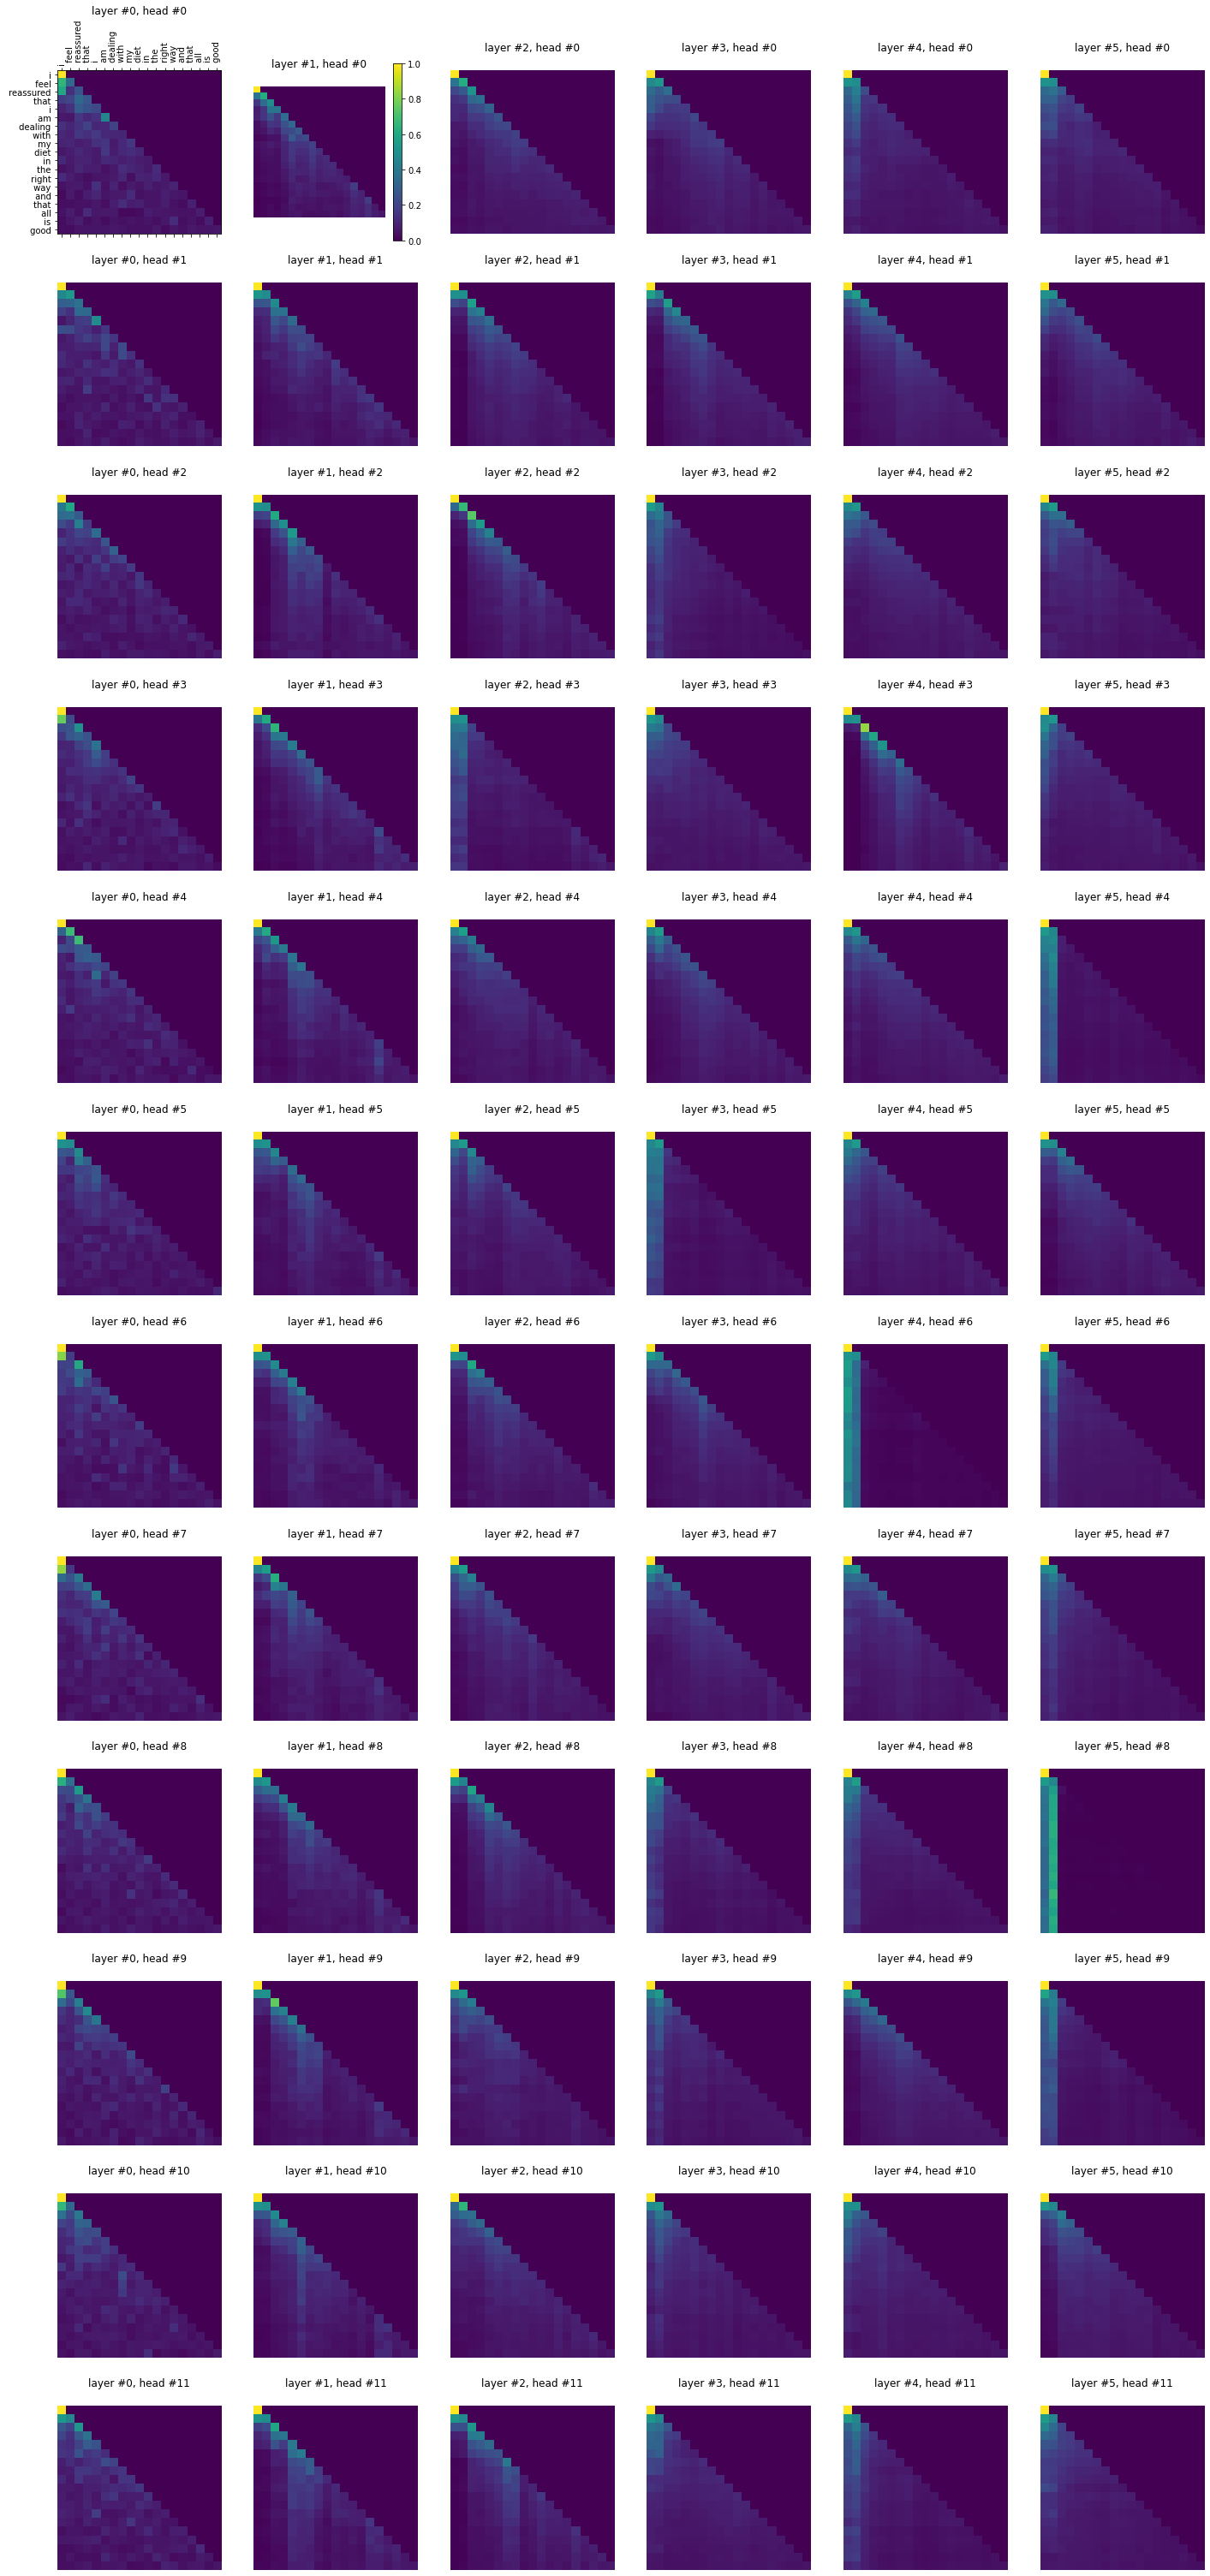

In [37]:
show_all_attentions(tokens, attns)

## Fine-tuning

–¢–µ–ø–µ—Ä—å –¥—Ä—É–≥–æ–π –ø–æ–¥—Ö–æ–¥: –∑–∞–≥—Ä—É–∑–∏–º –º–æ–¥–µ–ª—å, –∫–æ—Ç–æ—Ä–∞—è –æ–±—É—á–∞–ª–∞—Å—å —Ä–µ—à–∞—Ç—å –∑–∞–¥–∞—á—É Language Modeling. –ü–æ—Å–º–æ—Ç—Ä–∏–º, –ø–æ–ª—É—á–∏–º –ª–∏ –º—ã –ø—Ä–∏—Ä–æ—Å—Ç –≤ –∫–∞—á–µ—Å—Ç–≤–µ.

In [ ]:
try_to_clear_gpu_memory(["model_0", "optimizer", "criterion", "scheduler"])

In [32]:
model_1 = GPT2ForSequenceClassification.from_pretrained(
    "distilgpt2", 
    output_attentions=True,
    pad_token_id=tokenizer.eos_token_id,
    num_labels=NUM_LABELS,
    cache_dir=os.path.join(CACHE_BASE_DIR, r"huggingface\pretrained_models\distilgpt2\GPT2ForSequenceClassification")
).to(device)

Some weights of the model checkpoint at distilgpt2 were not used when initializing GPT2ForSequenceClassification: ['lm_head.weight']
- This IS expected if you are initializing GPT2ForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing GPT2ForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at distilgpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [34]:
lr = 1e-5  # –ü—Ä–µ–¥–ø–æ–ª–∞–≥–∞–µ–º—ã–π learning rate. –û–Ω –º–æ–∂–µ—Ç –±—ã—Ç—å –±–æ–ª—å—à–µ –∏–ª–∏ –º–µ–Ω—å—à–µ :)

optimizer = torch.optim.Adam(model_1.parameters(), lr=lr)
criterion = torch.nn.CrossEntropyLoss()
scheduler = None  # –ú–æ–∂–Ω–æ –¥–æ–±–∞–≤–∏—Ç—å —à–µ–¥—É–ª–µ—Ä –¥–ª—è –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–µ–π. –≠—Ç–æ –Ω–∞ —Ç–≤–æ–µ —É—Å–º–æ—Ç—Ä–µ–Ω–∏–µ

–í—ã–≤–æ–¥ –º–æ–¥–µ–ª–∏ –Ω–∏—á–µ–º –Ω–µ –æ—Ç–ª–∏—á–∞–µ—Ç—Å—è –æ—Ç –ø—Ä–µ–¥—ã–¥—É—â–µ–≥–æ —Å–ª—É—á–∞—è, –ø–æ—ç—Ç–æ–º—É —Å—Ä–∞–∑—É –ø—Ä–∏—Å—Ç—É–ø–∞–µ–º –∫ –æ–±—É—á–µ–Ω–∏—é:

In [35]:
%%time

enable_reproducibility(raise_if_no_deterministic=False)

num_epochs = 10

train_validate_model(
    model_1, num_epochs, train_loader, criterion, optimizer,
    valid_loader=valid_loader, lr_scheduler=scheduler,
    save_after_each_epoch=True, name_for_save="model_1")

enable_reproducibility()

model saved (epoch 1 / 10) to /content/drive/MyDrive/MIPT_DLS_II/14.1 –î–æ–º–∞—à–Ω–µ–µ –∑–∞–¥–∞–Ω–∏–µ. Transformers+/.cache/model_1_ep_1
Epoch: 1 | Train Loss: 1.7850530381202698 | Valid Loss: 1.2511820457875729 | Valid Accuracy: 0.5635


model saved (epoch 2 / 10) to /content/drive/MyDrive/MIPT_DLS_II/14.1 –î–æ–º–∞—à–Ω–µ–µ –∑–∞–¥–∞–Ω–∏–µ. Transformers+/.cache/model_1_ep_2
Epoch: 2 | Train Loss: 0.8883693593740464 | Valid Loss: 0.4396176668815315 | Valid Accuracy: 0.854


model saved (epoch 3 / 10) to /content/drive/MyDrive/MIPT_DLS_II/14.1 –î–æ–º–∞—à–Ω–µ–µ –∑–∞–¥–∞–Ω–∏–µ. Transformers+/.cache/model_1_ep_3
Epoch: 3 | Train Loss: 0.43191149389743805 | Valid Loss: 0.2572321759071201 | Valid Accuracy: 0.908


model saved (epoch 4 / 10) to /content/drive/MyDrive/MIPT_DLS_II/14.1 –î–æ–º–∞—à–Ω–µ–µ –∑–∞–¥–∞–Ω–∏–µ. Transformers+/.cache/model_1_ep_4
Epoch: 4 | Train Loss: 0.28487930428981784 | Valid Loss: 0.22945433272980154 | Valid Accuracy: 0.9145


model saved (epoch 5 / 10) to /content/drive/MyDrive/MIPT_DLS_II/14.1 –î–æ–º–∞—à–Ω–µ–µ –∑–∞–¥–∞–Ω–∏–µ. Transformers+/.cache/model_1_ep_5
Epoch: 5 | Train Loss: 0.22321637140214443 | Valid Loss: 0.19028441712725908 | Valid Accuracy: 0.9195


model saved (epoch 6 / 10) to /content/drive/MyDrive/MIPT_DLS_II/14.1 –î–æ–º–∞—à–Ω–µ–µ –∑–∞–¥–∞–Ω–∏–µ. Transformers+/.cache/model_1_ep_6
Epoch: 6 | Train Loss: 0.18755786164104937 | Valid Loss: 0.1688723990228027 | Valid Accuracy: 0.9295


model saved (epoch 7 / 10) to /content/drive/MyDrive/MIPT_DLS_II/14.1 –î–æ–º–∞—à–Ω–µ–µ –∑–∞–¥–∞–Ω–∏–µ. Transformers+/.cache/model_1_ep_7
Epoch: 7 | Train Loss: 0.16548036323487758 | Valid Loss: 0.1608343028347008 | Valid Accuracy: 0.935


model saved (epoch 8 / 10) to /content/drive/MyDrive/MIPT_DLS_II/14.1 –î–æ–º–∞—à–Ω–µ–µ –∑–∞–¥–∞–Ω–∏–µ. Transformers+/.cache/model_1_ep_8
Epoch: 8 | Train Loss: 0.1498073752373457 | Valid Loss: 0.1488130969228223 | Valid Accuracy: 0.932


model saved (epoch 9 / 10) to /content/drive/MyDrive/MIPT_DLS_II/14.1 –î–æ–º–∞—à–Ω–µ–µ –∑–∞–¥–∞–Ω–∏–µ. Transformers+/.cache/model_1_ep_9
Epoch: 9 | Train Loss: 0.14089297166466713 | Valid Loss: 0.1532885002088733 | Valid Accuracy: 0.932


model saved (epoch 10 / 10) to /content/drive/MyDrive/MIPT_DLS_II/14.1 –î–æ–º–∞—à–Ω–µ–µ –∑–∞–¥–∞–Ω–∏–µ. Transformers+/.cache/model_1_ep_10
Epoch: 10 | Train Loss: 0.12903531613945962 | Valid Loss: 0.15064787410665303 | Valid Accuracy: 0.934

CPU times: user 1h 3min 12s, sys: 15min 59s, total: 1h 19min 11s
Wall time: 1h 19min 20s


In [36]:
%%time
test_res = validate(model_1, test_loader, criterion, test=True, print_results=True)

Test Loss: 0.15572225884534419 | Test Accuracy: 0.927
CPU times: user 9.59 s, sys: 4.04 s, total: 13.6 s
Wall time: 13.6 s


–ï—Å—Ç—å –ª–∏ –ø—Ä–∏—Ä–æ—Å—Ç –∫–∞—á–µ—Å—Ç–≤–∞ –∏–ª–∏ —Å–∫–æ—Ä–æ—Å—Ç–∏ –æ–±—É—á–µ–Ω–∏—è?

–ü–æ—Å–º–æ—Ç—Ä–∏ –Ω–∞ –∫–∞—Ä—Ç—ã –≤–Ω–∏–º–∞–Ω–∏—è. –ï—Å—Ç—å –ª–∏ –æ—Ç–ª–∏—á–∏–µ –æ—Ç –ø—Ä–µ–¥—ã–¥—É—â–µ–≥–æ —Å–ª—É—á–∞—è?

In [37]:
# text = ... # –í—ã–±–µ—Ä–∏ —Ç–µ–∫—Å—Ç –∏–∑ –¥–∞—Ç–∞—Å–µ—Ç–∞
# tokens = tokenizer.tokenize(text)


In [38]:
num_epochs = 10  # last ep
model_1 = load_model("model_1", num_epochs, device=device, report=True)

model loaded from C:\.data_science_cache\model_1_ep_10


In [39]:
tokens, attns = get_attention_matrixes(model_1, tokenizer, text, device=device)
print(*tokens)

i  feel  reassured  that  i  am  dealing  with  my  diet  in  the  right  way  and  that  all  is  good


<ipython-input-32-81e460141e0f>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0][0].set_xticklabels(['']+seq, rotation=90)
<ipython-input-32-81e460141e0f>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0][0].set_yticklabels(['']+seq,)


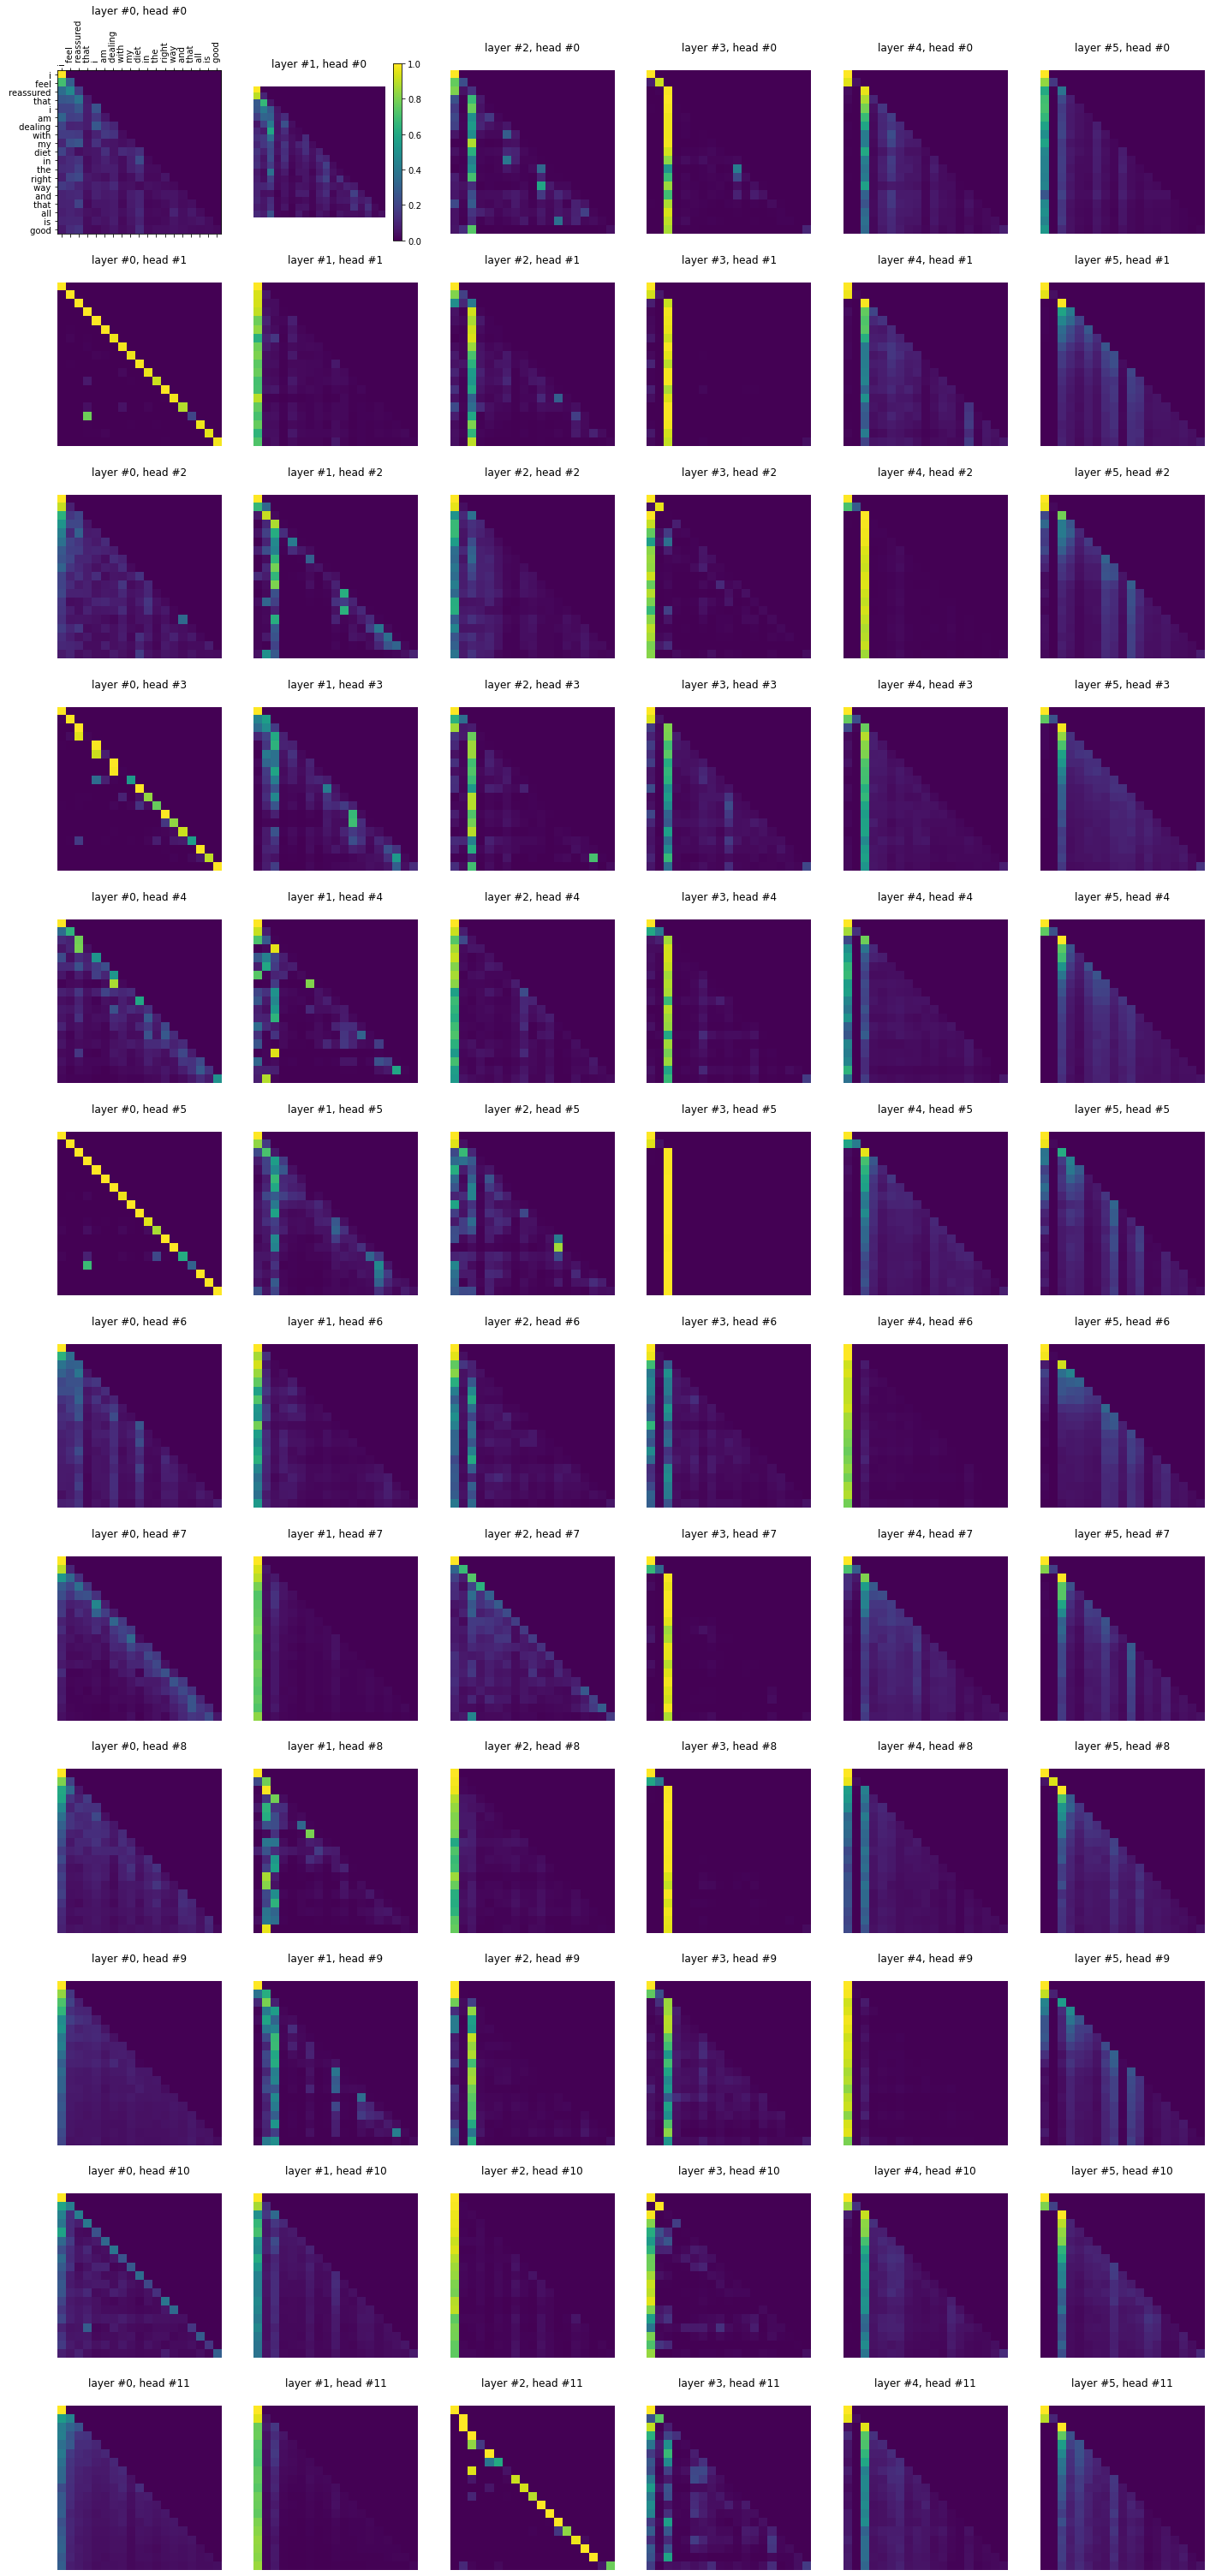

In [40]:
show_all_attentions(tokens, attns)

## –û—Ç—á–µ—Ç

–ü–æ–∫–∞–∂–∏ –∑–¥–µ—Å—å, —á—Ç–æ —Ç—ã –≤—ã–ø–æ–ª–Ω–∏–ª –ø–æ —ç—Ç–æ–π —Ä–∞–±–æ—Ç–µ. –û—Ç–≤–µ—Ç—å –Ω–∞ –Ω–µ—Å–∫–æ–ª—å–∫–æ –≤–æ–ø—Ä–æ—Å–æ–≤:
- Q: –ö–∞–∫–æ–π –ø–æ–¥—Ö–æ–¥ –æ–∫–∞–∑–∞–ª—Å—è –ª—É—á—à–µ?
- A: Fine-tuning (–∞ —Ä–∞–∑–≤–µ –º–æ–≥–ª–æ –±—ã –∏–Ω–∞—á–µ?) –ø–æ–∫–∞–∑–∞–ª –ø—Ä–µ–≤–æ—Å—Ö–æ–¥–Ω—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã: –≤—ã—Å–æ–∫–∏–µ –∏—Ç–æ–≥–æ–≤—ã–π performance –∏ —Å–∫–æ—Ä–æ—Å—Ç—å –æ–±—É—á–µ–Ω–∏—è. –£–∂–µ –Ω–∞ 2-–π —ç–ø–æ—Ö–µ –¥–æ–æ–±—É—á–∞–µ–º–∞—è –º–æ–¥–µ–ª—å –ø—Ä–µ–≤–∑–æ—à–ª–∞ –∏—Ç–æ–≥–æ–≤—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –æ–±—É—á–∞–µ–º–æ–π —Å –Ω—É–ª—è. –≠—Ç–æ —Ç–∞–∫–∂–µ –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç –≤—ã—Å–æ–∫–æ–µ –∫–∞—á–µ—Å—Ç–≤–æ —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤, –ø–æ–ª—É—á–∞–µ–º—ã—Ö –∏–∑ —Ä–µ—à–µ–Ω–∏—è –∑–∞–¥–∞—á–∏ Language Modeling.

- Q: –ù–∞ –∫–∞–∫–∏–µ —Å–ª–æ–≤–∞ –º–æ–¥–µ–ª—å –±–æ–ª—å—à–µ–≥–æ –≤—Å–µ–≥–æ –æ–±—Ä–∞—â–∞–ª–∞ –≤–Ω–∏–º–∞–Ω–∏–µ?
- A: 
    - __–û–±—É—á–µ–Ω–Ω–∞—è —Å –Ω—É–ª—è__. –ù–∞–±–ª—é–¥–∞–µ—Ç—Å—è –æ–±—â–∏–π –ø–∞—Ç—Ç–µ—Ä–Ω: —Ç—Ä–µ—É–≥–æ–ª—å–Ω–∏–∫–∏ —è—Ä—á–µ –≤ –≤–µ—Ä—Ö–Ω–µ–π —á–∞—Å—Ç–∏, —á—Ç–æ –≤ —Ü–µ–ª–æ–º –ª–æ–≥–∏—á–Ω–æ, —Ç–∞–∫ –∫–∞–∫ –º–æ–¥–µ–ª—å –º–æ–≥–ª–∞ —Å–º–æ—Ç—Ä–µ—Ç—å —Ç–æ–ª—å–∫–æ –Ω–∞–∑–∞–¥, –∞ –µ—Å–ª–∏ —Å–ª–æ–≤ –º–µ–Ω—å—à–µ, —Ç–æ –∏ –∑–Ω–∞—á–µ–Ω–∏—è –≤–µ—Å–æ–≤, —Å—É–º–º–∏—Ä—É–µ–º—ã–µ –≤ –µ–¥–∏–Ω—Ü—É, –±–æ–ª—å—à–µ, –∏ –∫—Ä–æ–º–µ —Ç–æ–≥–æ, –º–æ–¥–µ–ª—å —É—á–∏–ª–∞—Å—å —Å –Ω—É–ª—è, –∏, –≤–∏–¥–∏–º–æ, –µ–π –Ω–µ —Ö–≤–∞—Ç–∏–ª–æ –≤—Ä–µ–º–µ–Ω–∏ –∏/–∏–ª–∏ –¥–∞–Ω–Ω—ã—Ö –ø–µ—Ä–µ—É—á–∏—Ç—å—Å—è –Ω–∞ —á—Ç–æ-—Ç–æ –±–æ–ª–µ–µ –ø–æ–ª–µ–∑–Ω–æ–µ. –ú–Ω–æ–≥–æ –≥–æ–ª–æ–≤ –Ω–∞—É—á–∏–ª–æ—Å—å —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª—è—Ç—å –≤–Ω–∏–º–∞–Ω–∏–µ –Ω–∞ –ø–µ—Ä–≤—ã–µ –¥–≤–∞-—Ç—Ä–∏ —Å–ª–æ–≤–∞. –ï—Å—Ç—å —Ç–µ, —á—Ç–æ –Ω–∞–æ–±–æ—Ä–æ—Ç –ø—Ä–∏–Ω—Ü–∏–ø–∏–∞–ª—å–Ω–æ –Ω–µ —Å–º–æ—Ç—Ä—è—Ç –Ω–∞ –ø–µ—Ä–≤—ã–µ —Å–ª–æ–≤–∞, –∞ –Ω–∞ –ø–æ—Å–ª–µ–¥—É—é—â–∏–µ –±–æ–ª–µ–µ-–º–µ–Ω–µ–µ —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª—è—é—Ç –≤–Ω–∏–º–∞–Ω–∏–µ. –ü–∞—Ä–∞ —à—Ç—É–∫ –ø—ã—Ç–∞–µ—Ç—Å—è —Å–º–æ—Ç—Ä–µ—Ç—å –Ω–∞ —Å–µ—Ä–µ–¥–∏–Ω—É –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏—è.
    - __Fine-tuned__. –£ –Ω–µ—ë "—ç—Ñ—Ñ–µ–∫—Ç–∞ –≤–µ—Ä—Ö–Ω–µ–≥–æ —É–≥–ª–∞" –Ω–µ –Ω–∞–±–ª—é–¥–∞–µ—Ç—Å—è, –∑–∞—Ç–æ –µ—Å—Ç—å –¥—Ä—É–≥–æ–π, –¥–æ–≤–æ–ª—å–Ω–æ –∏–Ω—Ç–µ—Ä–µ—Å–Ω—ã–π: —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ–µ, "–≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–µ" —É–±—ã–≤–∞–Ω–∏–µ –≤ –∫–æ–ª–æ–Ω–∫–∞—Ö –≤–æ –º–Ω–æ–≥–∏—Ö –≥–æ–ª–æ–≤–∞—Ö. –ü–æ–ª—É—á–∞–µ—Ç—Å—è, —ç—Ç–∏ –≥–æ–ª–æ–≤—ã –Ω–∞—É—á–∏–ª–∏—Å—å —Å–º–æ—Ç—Ä–µ—Ç—å –Ω–∞ –æ–ø—Ä–µ–¥–µ–ª—ë–Ω–Ω—ã–µ –ø–æ–∑–∏—Ü–∏–∏/—Å–ª–æ–≤–∞, –ø—Ä–∏ —ç—Ç–æ–º –º–æ–¥–µ–ª—å —Å—á–∏—Ç–∞–µ—Ç, —á—Ç–æ –Ω–∞–∏–±–æ–ª–µ–µ –≤–∞–∂–Ω–æ —Å–º–æ—Ç—Ä–µ—Ç—å –≤ —ç—Ç—É –ø–æ–∑–∏—Ü–∏—é –¥–ª—è —Ç–µ—Ö —Å–ª–æ–≤, —á—Ç–æ –Ω–∞—Ö–æ–¥—è—Ç—Å—è –∫ –Ω–µ–π –±–ª–∏–∂–µ. –û–¥–Ω–∞–∫–æ, –≤ –Ω–µ–∫–æ—Ç–æ—Ä—ã—Ö –≥–æ–ª–æ–≤–∞—Ö —ç—Ç–æ –Ω–∞—Ä—É—à–∞–µ—Ç—Å—è, –∏ –º–æ–¥–µ–ª—å —Å—á–∏—Ç–∞–µ—Ç, —á—Ç–æ —ç—Ç–æ –≤–∞–∂–Ω–µ–µ –¥–µ–ª–∞—Ç—å –∏–∑ —Å–µ—Ä–µ–¥–∏–Ω—ã –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏—è. –ï—Å—Ç—å –≥–æ–ª–æ–≤—ã, –∫–æ—Ç–æ—Ä—ã–µ –ø—è–ª—è—Ç—Å—è —Ç–æ–ª—å–∫–æ –≤ —Ç–µ–∫—É—â–µ–µ —Å–ª–æ–≤–æ –∏–ª–∏ –∂–µ—Å—Ç–∫–æ –∑–∞—Ñ–∏–∫—Å–∏—Ä–æ–≤–∞–Ω–Ω—ã –Ω–∞ –∫–æ–Ω–∫—Ä–µ—Ç–Ω—ã—Ö –ø–æ–∑–∏—Ü–∏—è—Ö. –ß—Ç–æ –Ω–∞–∏–±–æ–ª–µ–µ –∏–Ω—Ç–µ—Ä–µ—Å–Ω–æ, –µ—Å—Ç—å —Ç–µ, —á—Ç–æ —Å–º–æ—Ç—Ä—è—Ç –æ–¥–Ω–æ–≤—Ä–µ–º–µ–Ω–Ω–æ –Ω–∞ —Ç–µ–∫—É—â–µ–µ —Å–ª–æ–≤–æ –∏ –Ω–∞ –ø–µ—Ä–≤–æ–µ, –∞ —Ç–∞–∫–∂–µ —Ç–µ —á—Ç–æ, —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª—è—é—Ç –≤–Ω–∏–º–∞–Ω–∏–µ –ù–ï –º–µ–∂–¥—É —Å–æ—Å–µ–¥–Ω–∏–º–∏ —Å–ª–æ–≤–∞–º–∏, –∞ —Å –ø—Ä–æ–ø—É—Å–∫–∞–º–∏ –≤ –ø–æ–∑–∏—Ü–∏—é –∏ –±–æ–ª—å—à–µ.

- Q: –ù–∞ –∫–∞–∫–∏—Ö —Å–ª–æ—è—Ö/–≥–æ–ª–æ–≤–∞—Ö –º–æ–¥–µ–ª—å –æ–±—Ä–∞—â–∞–ª–∞ –≤–Ω–∏–º–∞–Ω–∏–µ?
- A: 
    - __–û–±—É—á–µ–Ω–Ω–∞—è —Å –Ω—É–ª—è__. –ù–∞ –Ω—É–ª–µ–≤–æ–º —Å–ª–æ–µ –≤–Ω–∏–º–∞–Ω–∏–µ, –∫–∞–∂–µ—Ç—Å—è, —Ä–∞–∑–±—Ä–æ—Å–∞–Ω–æ –∫–∞–∫ –ø–æ–ø–∞–ª–æ. –ü–æ—Ö–æ–∂–µ –Ω–∞ —Ü–≤–µ—Ç–Ω–æ–π –º–æ–∑–∞–∏—á–Ω—ã–π –∫–æ–≤—Ä–∏–∫. –ù–∞ –ø–µ—Ä–≤–æ–º-–≤—Ç–æ—Ä–æ–º —Å–º–æ—Ç—Ä–∏—Ç –≤ —Å–µ—Ä–µ–¥–∏–Ω—É –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏—è, –Ω–∞ –ø–æ—Å–ª–µ–¥–Ω–∏—Ö —Ç—Ä—ë—Ö –Ω–∞ –Ω–∞—á–∞–ª—å–Ω—ã–µ —Å–ª–æ–≤–∞. –≠—Ç–æ –≤ –æ—Å–Ω–æ–≤–Ω–æ–º, —Ç.–∫. –Ω–∞ –∫–∞–∂–¥–æ–º —Å–ª–æ–µ –µ—Å—Ç—å –≥–æ–ª–æ–≤—ã, –∫–æ—Ç–æ—Ä—ã–µ –ø–æ—Ö–æ–∂–∏ –ø–æ –ø–æ–≤–µ–¥–µ–Ω–∏—é –Ω–∞ –≥–æ–ª–æ–≤—ã –¥—Ä—É–≥–∏—Ö —Å–ª–æ–µ–≤.
    - __Fine-tuned__. –ù–∞ –Ω—É–ª–µ–≤–æ–º —Å–ª–æ–µ –ª–∏–±–æ –∂–µ—Å—Ç–∫–æ –≤ —Ç–µ–∫—É—â–µ–µ —Å–ª–æ–≤–æ, –ª–∏–±–æ –Ω–∞ –ø–µ—Ä–≤–æ–µ. –ù–∞ –ø–µ—Ä–≤–æ–º-–≤—Ç–æ—Ä–æ–º –≤ –∫–æ–Ω–∫—Ä–µ—Ç–Ω—ã–µ, –Ω–æ –≤ –æ—Å–Ω–æ–≤–Ω–æ–º –Ω–∞—á–∞–ª—å–Ω—ã–µ —Å–ª–æ–≤–∞, –ø—Ä–∏—á–µ–º —ç—Ñ—Ñ–µ–∫—Ç —É–±—ã–≤–∞–Ω–∏—è –≤–∞–∂–Ω–æ—Å—Ç–∏, –æ–ø–∏—Å–∞–Ω–Ω—ã–π –≤—ã—à–µ, –µ—â–µ –Ω–µ —Å—Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–ª—Å—è: –≤ —Å—Ç–æ–ª–±—Ü–∞—Ö –º–æ–∑–∞–∏–∫–∞. –ù–∞ —Ç—Ä–µ—Ç—å–µ–º-—á–µ—Ç–≤–µ—Ä—Ç–æ–º –∂–µ—Å—Ç–∫–æ –≤ –æ–¥–Ω—É –∏–∑ –Ω–∞—á–∞–ª—å–Ω—ã—Ö –ø–æ–∑–∏—Ü–∏–π. –ù–∞ —á–µ—Ç–≤–µ—Ä—Ç–æ–º-–ø—è—Ç–æ–º —Å—Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–ª—Å—è –æ–ø–∏—Å–∞–Ω–Ω—ã–π –≤—ã—à–µ —ç—Ñ—Ñ–µ–∫—Ç, –ø—Ä–∏—á–µ–º –º–æ–¥–µ–ª—å —Å–º–æ—Ç—Ä–∏—Ç —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ –≤ –æ–ø—Ä–µ–¥–µ–ª—ë–Ω–Ω—ã–µ —Å–æ—á–µ—Ç–∞–Ω–∏—è –ø–æ–∑–∏—Ü–∏–π, –Ω–µ –≤—Å–µ–≥–¥–∞ –∏–¥—É—â–∏–µ –ø–æ–¥—Ä—è–¥.

–í —Ü–µ–ª–æ–º –º–æ–∂–Ω–æ —Å–∫–∞–∑–∞—Ç—å, —á—Ç–æ —É fine-tuned –º–æ–¥–µ–ª–∏ –≤–Ω–∏–º–∞–Ω–∏–µ –±–æ–ª–µ–µ –≤—ã–∑—Ä–µ–≤—à–µ–µ, —Ü–µ–ø–∫–æ–µ, –∞ –µ–≥–æ –≥–æ–ª–æ–≤—ã —Å–ø–µ—Ü–∏–∞–ª–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω–µ–µ.